# Word Embeddings, Gated Recurrent Networks with LSTM, GRU & Dense Layers and Statistical Significances such as distances

In this, we use various ML methods, including gated recurrent networks from the Keras interface, 
on a well-known text processing example, that of a flipkart product reviews sentiment analysis. In this version we use the scrapped dataset from flipkart of product reviews to predict a positive or negative evaluation.

In [334]:
# Importing the libraries
import datetime
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import numpy as np
import spacy
from textblob import TextBlob
import en_core_web_sm
import pyttsx3
from nltk import chunk
from nltk.tag import DefaultTagger
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.preprocessing import sequence
from keras import models, layers, optimizers, datasets, utils, losses
from scipy.spatial import distance
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from keras.preprocessing.sequence import pad_sequences
from collections import Counter
import nltk
import seaborn as sns
import string
from nltk.corpus import stopwords
import regex as re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import eval
from keras.optimizers import Adam
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D,MaxPooling1D
import torch
import torchtext
import tensorflow as tf
import keras
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [335]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [336]:
df = pd.read_csv("product_reviews_labelled_dataset2.csv")

df = df[["Reviews","Sentiments"]]
df['Sentiments'] = df['Sentiments'].map({'positive':'1', 'negative':'0', 'neutral':'0'})


reviews = df['Reviews']
labels = df['Sentiments']

In [337]:
print(len(reviews))

818


In [338]:
print(len(labels))

818


In [339]:
reviews[3]

'First of all thank you Flipkart,Second one is Hisense.Now review for my 43’ led Tv. Some people say this product review wrong .But My opinion this one is awesome.Very fast connect .Picture quality is very nice 4K mode and HD both mode . Product is impressed for me and my family. Sound is very nice . All function are work very nicely  and also useful .All over experience is unbelievable. Once again Thankyou Flipkart and installation team.'

In [340]:
stop = set(stopwords.words('english'))

In [341]:
def clean_document(doco):
    punctuation = string.punctuation
    punc_replace = ''.join([' ' for s in punctuation])
    doco_link_clean = re.sub(r'http\S+', '', doco)
    doco_clean_and = re.sub(r'&\S+', '', doco_link_clean)
    doco_clean_at = re.sub(r'@\S+', '', doco_clean_and)
    doco_clean = doco_clean_at.replace('-', ' ')
    doco_alphas = re.sub(r'\W +', ' ', doco_clean)
    trans_table = str.maketrans(punctuation, punc_replace)
    doco_clean = ' '.join([word.translate(trans_table) for word in doco_alphas.split(' ')])
    doco_clean = doco_clean.split(' ')
    p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
    doco_clean = [word.lower() for word in doco_clean if len(word) > 2]
    doco_clean = ([i for i in doco_clean if i not in stop])
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
    return doco_clean

In [342]:
# Generate a cleaned reviews array from original review texts
review_cleans = [clean_document(doc) for doc in reviews];
sentences = [' '.join(r) for r in review_cleans ]

In [343]:
print(sentences[7])

simply superb productpicture sound quality niceconnectivity awesomecast function android oreo versions easily connect version little bit tough voice activated blue tooth remote control work super google assistant reply responsible quicklyfinally opinion value money five years warranty panel good choice budget segment product good review last six days one month complete comments publish thank


In [344]:
print(reviews[7])

Simply superb productPicture and sound quality niceConnectivity is awesomeCast function above android Oreo versions easily connect, below version little bit tough.Voice activated blue tooth remote control work super and Google assistant reply responsible is quicklyFinally  my opinion is value for money and five years warranty ( panel only) is good choice for budget segment in this product  very good. My review is last six days. After one month  complete more comments will publish. Thank ...


In [345]:
reviews.shape

(818,)

In [346]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

In [347]:
text_sequences = np.array(tokenizer.texts_to_sequences(sentences))
sequence_dict = tokenizer.word_index
word_dict = dict((num, val) for (val, num) in sequence_dict.items())

In [348]:
print(text_sequences)

[list([38, 18]) list([52, 12, 2])
 list([202, 673, 1101, 1102, 432, 353, 388, 388, 289, 1, 5, 30, 576, 354, 20, 1103, 249, 1104, 20, 157, 12, 2, 55, 164, 146, 222, 62, 46, 14, 674, 8, 46, 14, 577, 98, 675, 827, 250, 1, 433, 165, 578, 12, 203, 1105, 158, 578])
 list([55, 85, 15, 498, 9, 249, 20, 204, 205, 79, 3, 20, 676, 290, 9, 13, 86, 147, 12, 2, 7, 203, 203, 3, 268, 434, 4, 7, 139, 72, 677, 8, 140, 51, 678, 579, 15, 26, 269])
 list([251, 20, 166, 40, 17, 56, 3, 15, 291, 27, 26, 292, 1106, 319, 249, 167, 320, 1107, 321, 188, 828, 252, 23, 148, 75, 580, 28, 89, 1108, 127, 176, 435, 85, 249, 15])
 list([3, 1109, 1110, 1111, 9, 46, 206, 9, 829, 177, 168, 1112, 679, 322, 9, 581, 323, 830, 223, 45, 1113, 499, 582, 680, 577, 164, 168, 831, 681, 355, 679, 1114, 1115, 235, 682, 683, 39, 178, 5, 30])
 list([324, 253, 105, 684, 15, 1116, 13, 149, 832, 685, 1117, 1118, 583, 1119, 833, 1120, 1121, 389, 249, 1122, 270, 436, 686, 356, 1123, 149, 1124, 436, 684, 1125, 1126, 834, 81, 584, 53, 687, 53

In [349]:
print(sequence_dict)

{'good': 1, 'quality': 2, 'product': 3, 'sound': 4, 'price': 5, 'bass': 6, 'nice': 7, 'also': 8, 'one': 9, 'best': 10, 'battery': 11, 'picture': 12, 'awesome': 13, 'great': 14, 'flipkart': 15, 'like': 16, 'use': 17, 'money': 18, 'buy': 19, 'review': 20, 'time': 21, 'connectivity': 22, 'using': 23, 'well': 24, 'really': 25, 'installation': 26, 'delivery': 27, 'better': 28, 'super': 29, 'range': 30, 'backup': 31, 'excellent': 32, 'boat': 33, 'amazing': 34, 'overall': 35, 'easy': 36, 'cleaner': 37, 'value': 38, 'worth': 39, 'days': 40, 'design': 41, 'much': 42, 'vacuum': 43, 'get': 44, 'bit': 45, 'looks': 46, 'even': 47, 'clear': 48, 'music': 49, 'day': 50, 'experience': 51, 'superb': 52, 'power': 53, 'suction': 54, 'first': 55, 'happy': 56, 'cleaning': 57, 'bluetooth': 58, 'used': 59, 'clean': 60, 'long': 61, 'video': 62, 'love': 63, 'works': 64, 'little': 65, 'voice': 66, 'budget': 67, 'low': 68, 'clarity': 69, 'pretty': 70, 'full': 71, 'work': 72, 'build': 73, 'perfect': 74, 'home': 75

In [350]:
reviews_encoded = [];
for i,review in enumerate(review_cleans):
    reviews_encoded.append([sequence_dict[x] for x in review]);

(array([ 3., 47., 54., 17., 26., 22., 22., 17., 10., 15., 17., 16., 23.,
        26., 13., 22., 34., 22., 13., 13., 12., 16., 17., 29.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 24 Patch objects>)

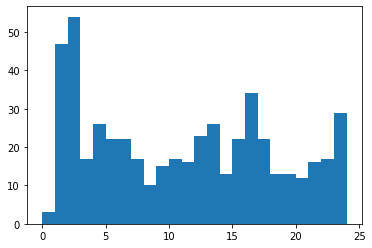

In [351]:
lengths = [len(x) for x in reviews_encoded]
plt.hist(lengths, bins=range(25))

In [352]:
print(reviews_encoded[135])

[190, 752, 10, 272, 12, 4, 2, 34, 625, 231, 920, 227, 446, 394, 173, 109, 200, 626, 46, 1, 127, 1293, 12, 331, 44, 1, 12, 2, 753, 146, 152, 625, 8, 177, 200, 114, 921, 96, 1294, 922, 204, 1295, 1296, 136, 753, 146]


In [353]:
max_cap =8;
X = pad_sequences(reviews_encoded, maxlen=max_cap, truncating='post')

In [354]:
Y = np.array([[0,1] if '0' in label else [1,0] for label in labels])

In [355]:
np.random.seed(1024);
random_posits = np.arange(len(X))
np.random.shuffle(random_posits);

In [356]:
X = X[random_posits];
Y = Y[random_posits];

In [357]:
train_cap = int(0.85 * len(X));
dev_cap = int(0.93 * len(X));

In [358]:
X_train, Y_train = X[:train_cap], Y[:train_cap]
X_dev, Y_dev = X[train_cap:dev_cap], Y[train_cap:dev_cap]
X_test1, Y_test1 = X[dev_cap:], Y[dev_cap:]

In [359]:
x_train = X_train
y_train = Y_train
x_test = X_dev
y_test = Y_dev

Epoch 1/1000
44/44 [==============================] - 1s 15ms/step - loss: 0.4743 - accuracy: 0.9065 - val_loss: 0.3663 - val_accuracy: 0.8769
Epoch 2/1000
44/44 [==============================] - 0s 9ms/step - loss: 0.2987 - accuracy: 0.9165 - val_loss: 0.3747 - val_accuracy: 0.8769
Epoch 3/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.2795 - accuracy: 0.9165 - val_loss: 0.3958 - val_accuracy: 0.8769
Epoch 4/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.2683 - accuracy: 0.9165 - val_loss: 0.3659 - val_accuracy: 0.8769
Epoch 5/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.2614 - accuracy: 0.9165 - val_loss: 0.3508 - val_accuracy: 0.8769
Epoch 6/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.2382 - accuracy: 0.9165 - val_loss: 0.3357 - val_accuracy: 0.8923
Epoch 7/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.2213 - accuracy: 0.9180 - val_loss: 0.3153 - val_accuracy: 0.8923
Epoch

44/44 [==============================] - 0s 8ms/step - loss: 0.0179 - accuracy: 0.9957 - val_loss: 0.7453 - val_accuracy: 0.9077
Epoch 116/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0169 - accuracy: 0.9928 - val_loss: 0.6293 - val_accuracy: 0.8923
Epoch 117/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0162 - accuracy: 0.9957 - val_loss: 0.7271 - val_accuracy: 0.9077
Epoch 118/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0129 - accuracy: 0.9942 - val_loss: 0.8434 - val_accuracy: 0.9077
Epoch 119/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0201 - accuracy: 0.9914 - val_loss: 0.7938 - val_accuracy: 0.9077
Epoch 120/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0191 - accuracy: 0.9928 - val_loss: 0.7663 - val_accuracy: 0.9077
Epoch 121/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0143 - accuracy: 0.9914 - val_loss: 0.7710 - val_accuracy: 0.9077
Epoch 1

Epoch 172/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0190 - accuracy: 0.9942 - val_loss: 0.6709 - val_accuracy: 0.8923
Epoch 173/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0161 - accuracy: 0.9942 - val_loss: 0.7176 - val_accuracy: 0.8923
Epoch 174/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0125 - accuracy: 0.9942 - val_loss: 0.6790 - val_accuracy: 0.8923
Epoch 175/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0103 - accuracy: 0.9957 - val_loss: 0.7598 - val_accuracy: 0.8923
Epoch 176/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0153 - accuracy: 0.9928 - val_loss: 0.6773 - val_accuracy: 0.8923
Epoch 177/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0276 - accuracy: 0.9885 - val_loss: 0.6696 - val_accuracy: 0.9077
Epoch 178/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0158 - accuracy: 0.9957 - val_loss: 0.6608 - val_accuracy:

Epoch 285/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0153 - accuracy: 0.9957 - val_loss: 0.8256 - val_accuracy: 0.9077
Epoch 286/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0152 - accuracy: 0.9942 - val_loss: 0.8133 - val_accuracy: 0.9077
Epoch 287/1000
44/44 [==============================] - 0s 9ms/step - loss: 0.0102 - accuracy: 0.9971 - val_loss: 0.7757 - val_accuracy: 0.9077
Epoch 288/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0113 - accuracy: 0.9971 - val_loss: 0.8025 - val_accuracy: 0.9077
Epoch 289/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0145 - accuracy: 0.9971 - val_loss: 0.7945 - val_accuracy: 0.9077
Epoch 290/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0101 - accuracy: 0.9986 - val_loss: 0.8186 - val_accuracy: 0.9077
Epoch 291/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0126 - accuracy: 0.9957 - val_loss: 0.7779 - val_accuracy:

Epoch 342/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0120 - accuracy: 0.9957 - val_loss: 0.8171 - val_accuracy: 0.9077
Epoch 343/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0126 - accuracy: 0.9957 - val_loss: 0.8352 - val_accuracy: 0.9077
Epoch 344/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0160 - accuracy: 0.9971 - val_loss: 0.7816 - val_accuracy: 0.9077
Epoch 345/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0182 - accuracy: 0.9942 - val_loss: 0.8675 - val_accuracy: 0.9077
Epoch 346/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0115 - accuracy: 0.9957 - val_loss: 0.7871 - val_accuracy: 0.9077
Epoch 347/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0140 - accuracy: 0.9971 - val_loss: 0.7842 - val_accuracy: 0.9077
Epoch 348/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0137 - accuracy: 0.9942 - val_loss: 0.7299 - val_accuracy:

Epoch 399/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0113 - accuracy: 0.9957 - val_loss: 0.7626 - val_accuracy: 0.9077
Epoch 400/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0094 - accuracy: 0.9957 - val_loss: 0.7671 - val_accuracy: 0.9231
Epoch 401/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0138 - accuracy: 0.9942 - val_loss: 0.7803 - val_accuracy: 0.9231
Epoch 402/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0142 - accuracy: 0.9942 - val_loss: 0.7453 - val_accuracy: 0.9077
Epoch 403/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0116 - accuracy: 0.9957 - val_loss: 0.7667 - val_accuracy: 0.9077
Epoch 404/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0161 - accuracy: 0.9928 - val_loss: 0.9100 - val_accuracy: 0.9077
Epoch 405/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0156 - accuracy: 0.9942 - val_loss: 0.8105 - val_accuracy:

Epoch 456/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0150 - accuracy: 0.9942 - val_loss: 0.7996 - val_accuracy: 0.9077
Epoch 457/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0103 - accuracy: 0.9957 - val_loss: 0.6833 - val_accuracy: 0.9231
Epoch 458/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0141 - accuracy: 0.9957 - val_loss: 0.6770 - val_accuracy: 0.9231
Epoch 459/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0161 - accuracy: 0.9942 - val_loss: 0.7203 - val_accuracy: 0.9231
Epoch 460/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0122 - accuracy: 0.9957 - val_loss: 0.7499 - val_accuracy: 0.9231
Epoch 461/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0173 - accuracy: 0.9942 - val_loss: 0.7713 - val_accuracy: 0.9231
Epoch 462/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0076 - accuracy: 0.9986 - val_loss: 0.8284 - val_accuracy:

Epoch 513/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0100 - accuracy: 0.9957 - val_loss: 0.7274 - val_accuracy: 0.9077
Epoch 514/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0104 - accuracy: 0.9957 - val_loss: 0.8115 - val_accuracy: 0.9077
Epoch 515/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0187 - accuracy: 0.9942 - val_loss: 0.8156 - val_accuracy: 0.9077
Epoch 516/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0102 - accuracy: 0.9957 - val_loss: 0.8119 - val_accuracy: 0.9077
Epoch 517/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0127 - accuracy: 0.9971 - val_loss: 0.8053 - val_accuracy: 0.9077
Epoch 518/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0160 - accuracy: 0.9942 - val_loss: 0.8175 - val_accuracy: 0.9077
Epoch 519/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0108 - accuracy: 0.9957 - val_loss: 0.7569 - val_accuracy:

Epoch 570/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0089 - accuracy: 0.9971 - val_loss: 0.9361 - val_accuracy: 0.9077
Epoch 571/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0123 - accuracy: 0.9971 - val_loss: 0.9015 - val_accuracy: 0.9077
Epoch 572/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0133 - accuracy: 0.9957 - val_loss: 0.8331 - val_accuracy: 0.9077
Epoch 573/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0109 - accuracy: 0.9971 - val_loss: 0.8959 - val_accuracy: 0.9077
Epoch 574/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0129 - accuracy: 0.9942 - val_loss: 0.9553 - val_accuracy: 0.9077
Epoch 575/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0075 - accuracy: 0.9971 - val_loss: 0.9467 - val_accuracy: 0.9077
Epoch 576/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0116 - accuracy: 0.9957 - val_loss: 0.9734 - val_accuracy:

Epoch 627/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0120 - accuracy: 0.9971 - val_loss: 0.8683 - val_accuracy: 0.9077
Epoch 628/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0127 - accuracy: 0.9971 - val_loss: 0.8642 - val_accuracy: 0.9077
Epoch 629/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0081 - accuracy: 0.9986 - val_loss: 0.8667 - val_accuracy: 0.9077
Epoch 630/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0122 - accuracy: 0.9957 - val_loss: 0.8678 - val_accuracy: 0.9077
Epoch 631/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0122 - accuracy: 0.9971 - val_loss: 0.8833 - val_accuracy: 0.9077
Epoch 632/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0119 - accuracy: 0.9971 - val_loss: 0.8423 - val_accuracy: 0.9077
Epoch 633/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0122 - accuracy: 0.9957 - val_loss: 0.9072 - val_accuracy:

Epoch 684/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0177 - accuracy: 0.9971 - val_loss: 0.9161 - val_accuracy: 0.9077
Epoch 685/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0159 - accuracy: 0.9928 - val_loss: 0.9560 - val_accuracy: 0.9077
Epoch 686/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0099 - accuracy: 0.9971 - val_loss: 0.9102 - val_accuracy: 0.9077
Epoch 687/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0118 - accuracy: 0.9957 - val_loss: 0.9087 - val_accuracy: 0.9077
Epoch 688/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0112 - accuracy: 0.9942 - val_loss: 0.8649 - val_accuracy: 0.9077
Epoch 689/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0111 - accuracy: 0.9971 - val_loss: 0.9012 - val_accuracy: 0.9077
Epoch 690/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0150 - accuracy: 0.9914 - val_loss: 0.9334 - val_accuracy:

Epoch 741/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0094 - accuracy: 0.9971 - val_loss: 0.9329 - val_accuracy: 0.9077
Epoch 742/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0171 - accuracy: 0.9957 - val_loss: 0.8770 - val_accuracy: 0.9077
Epoch 743/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0097 - accuracy: 0.9986 - val_loss: 0.9259 - val_accuracy: 0.9077
Epoch 744/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0149 - accuracy: 0.9971 - val_loss: 0.9629 - val_accuracy: 0.9077
Epoch 745/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0140 - accuracy: 0.9942 - val_loss: 0.8676 - val_accuracy: 0.9077
Epoch 746/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0122 - accuracy: 0.9942 - val_loss: 0.9798 - val_accuracy: 0.8923
Epoch 747/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0146 - accuracy: 0.9957 - val_loss: 1.0044 - val_accuracy:

Epoch 798/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0155 - accuracy: 0.9971 - val_loss: 0.9226 - val_accuracy: 0.8923
Epoch 799/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0101 - accuracy: 0.9942 - val_loss: 0.9360 - val_accuracy: 0.8923
Epoch 800/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0107 - accuracy: 0.9957 - val_loss: 0.9621 - val_accuracy: 0.8923
Epoch 801/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0182 - accuracy: 0.9957 - val_loss: 1.0379 - val_accuracy: 0.8923
Epoch 802/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0120 - accuracy: 0.9986 - val_loss: 0.9533 - val_accuracy: 0.8923
Epoch 803/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0113 - accuracy: 0.9957 - val_loss: 0.9333 - val_accuracy: 0.9077
Epoch 804/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0106 - accuracy: 0.9957 - val_loss: 0.9173 - val_accuracy:

Epoch 855/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0090 - accuracy: 0.9986 - val_loss: 0.8982 - val_accuracy: 0.9077
Epoch 856/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0085 - accuracy: 0.9971 - val_loss: 0.9325 - val_accuracy: 0.9077
Epoch 857/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0125 - accuracy: 0.9957 - val_loss: 0.9307 - val_accuracy: 0.9077
Epoch 858/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0197 - accuracy: 0.9942 - val_loss: 0.8667 - val_accuracy: 0.9077
Epoch 859/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0096 - accuracy: 0.9986 - val_loss: 0.8651 - val_accuracy: 0.9077
Epoch 860/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0107 - accuracy: 0.9986 - val_loss: 0.8634 - val_accuracy: 0.9077
Epoch 861/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0088 - accuracy: 0.9971 - val_loss: 0.8168 - val_accuracy:

Epoch 912/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0094 - accuracy: 0.9971 - val_loss: 0.8419 - val_accuracy: 0.9077
Epoch 913/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0142 - accuracy: 0.9971 - val_loss: 0.8127 - val_accuracy: 0.9077
Epoch 914/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0099 - accuracy: 0.9971 - val_loss: 0.8593 - val_accuracy: 0.9077
Epoch 915/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0131 - accuracy: 0.9971 - val_loss: 0.8373 - val_accuracy: 0.9077
Epoch 916/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0149 - accuracy: 0.9971 - val_loss: 0.7825 - val_accuracy: 0.9231
Epoch 917/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0073 - accuracy: 0.9986 - val_loss: 0.7992 - val_accuracy: 0.9231
Epoch 918/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0082 - accuracy: 0.9971 - val_loss: 0.8449 - val_accuracy:

Epoch 969/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0091 - accuracy: 0.9971 - val_loss: 0.8575 - val_accuracy: 0.9077
Epoch 970/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0083 - accuracy: 0.9971 - val_loss: 0.8694 - val_accuracy: 0.9077
Epoch 971/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0070 - accuracy: 0.9986 - val_loss: 0.8925 - val_accuracy: 0.9077
Epoch 972/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0080 - accuracy: 0.9986 - val_loss: 0.8806 - val_accuracy: 0.9077
Epoch 973/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0082 - accuracy: 0.9971 - val_loss: 0.9218 - val_accuracy: 0.8923
Epoch 974/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0095 - accuracy: 0.9957 - val_loss: 0.9483 - val_accuracy: 0.8923
Epoch 975/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0063 - accuracy: 0.9971 - val_loss: 0.9637 - val_accuracy:

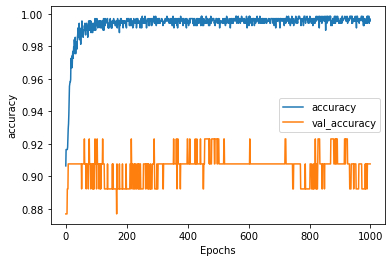

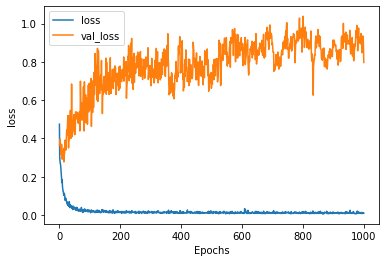

In [360]:
# Program that uses and embedding layer and an LSTM to learn some sentiment analysis from product reviews.
batch_size = 16
inputs = layers.Input(shape=(max_cap,))
e=layers.Embedding(len(word_dict)+1, max_cap, input_length=max_cap)(inputs)
h=layers.LSTM(128, dropout=0.8, recurrent_dropout=0.8)(e)
outputs=layers.Dense(2, activation='sigmoid')(h)
model_LSTM = models.Model(inputs, outputs)

model_LSTM.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_LSTM = model_LSTM.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=1000,
          validation_data=(x_test, y_test))

score, acc = model_LSTM.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test accuracy:', acc)

plot_graphs(history_LSTM, "accuracy")
plot_graphs(history_LSTM, "loss")

Epoch 1/1000
44/44 [==============================] - 1s 21ms/step - loss: 0.4816 - accuracy: 0.8878 - val_loss: 0.3449 - val_accuracy: 0.8769
Epoch 2/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.2654 - accuracy: 0.9165 - val_loss: 0.3381 - val_accuracy: 0.8769
Epoch 3/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.2274 - accuracy: 0.9165 - val_loss: 0.3110 - val_accuracy: 0.8923
Epoch 4/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.1909 - accuracy: 0.9165 - val_loss: 0.2902 - val_accuracy: 0.8923
Epoch 5/1000
44/44 [==============================] - 1s 15ms/step - loss: 0.1475 - accuracy: 0.9381 - val_loss: 0.2476 - val_accuracy: 0.8923
Epoch 6/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.1225 - accuracy: 0.9554 - val_loss: 0.2698 - val_accuracy: 0.9077
Epoch 7/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0933 - accuracy: 0.9640 - val_loss: 0.2112 - val_accuracy: 0.9077

Epoch 58/1000
44/44 [==============================] - 1s 13ms/step - loss: 0.0138 - accuracy: 0.9957 - val_loss: 0.3075 - val_accuracy: 0.9077
Epoch 59/1000
44/44 [==============================] - 1s 13ms/step - loss: 0.0138 - accuracy: 0.9957 - val_loss: 0.2982 - val_accuracy: 0.9077
Epoch 60/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0099 - accuracy: 0.9986 - val_loss: 0.3045 - val_accuracy: 0.9077
Epoch 61/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0087 - accuracy: 0.9971 - val_loss: 0.3208 - val_accuracy: 0.9077
Epoch 62/1000
44/44 [==============================] - 1s 13ms/step - loss: 0.0109 - accuracy: 0.9971 - val_loss: 0.3683 - val_accuracy: 0.9385
Epoch 63/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0189 - accuracy: 0.9928 - val_loss: 0.3480 - val_accuracy: 0.9231
Epoch 64/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0110 - accuracy: 0.9986 - val_loss: 0.2979 - val_accuracy:

44/44 [==============================] - 1s 14ms/step - loss: 0.0057 - accuracy: 0.9986 - val_loss: 0.4604 - val_accuracy: 0.9231
Epoch 171/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0054 - accuracy: 0.9986 - val_loss: 0.4653 - val_accuracy: 0.9231
Epoch 172/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0084 - accuracy: 0.9986 - val_loss: 0.4123 - val_accuracy: 0.9231
Epoch 173/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0058 - accuracy: 0.9986 - val_loss: 0.4229 - val_accuracy: 0.9231
Epoch 174/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0089 - accuracy: 0.9986 - val_loss: 0.4904 - val_accuracy: 0.9231
Epoch 175/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.5798 - val_accuracy: 0.9231
Epoch 176/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0063 - accuracy: 0.9986 - val_loss: 0.5819 - val_accuracy: 0.9077


44/44 [==============================] - 1s 14ms/step - loss: 0.0043 - accuracy: 0.9986 - val_loss: 0.5468 - val_accuracy: 0.9385
Epoch 283/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 0.5485 - val_accuracy: 0.9385
Epoch 284/1000
44/44 [==============================] - 1s 13ms/step - loss: 0.0059 - accuracy: 0.9986 - val_loss: 0.5645 - val_accuracy: 0.9385
Epoch 285/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0059 - accuracy: 0.9986 - val_loss: 0.5200 - val_accuracy: 0.9385
Epoch 286/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0057 - accuracy: 0.9986 - val_loss: 0.5204 - val_accuracy: 0.9385
Epoch 287/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 0.5236 - val_accuracy: 0.9385
Epoch 288/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0063 - accuracy: 0.9986 - val_loss: 0.5263 - val_accuracy: 0.9385


44/44 [==============================] - 1s 14ms/step - loss: 0.0042 - accuracy: 0.9986 - val_loss: 0.5456 - val_accuracy: 0.9385
Epoch 395/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 0.5456 - val_accuracy: 0.9385
Epoch 396/1000
44/44 [==============================] - 1s 16ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.5472 - val_accuracy: 0.9385
Epoch 397/1000
44/44 [==============================] - 1s 15ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.5530 - val_accuracy: 0.9385
Epoch 398/1000
44/44 [==============================] - 1s 16ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.5498 - val_accuracy: 0.9385
Epoch 399/1000
44/44 [==============================] - 1s 15ms/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 0.5531 - val_accuracy: 0.9385
Epoch 400/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0053 - accuracy: 0.9986 - val_loss: 0.5822 - val_accuracy: 0.9231


44/44 [==============================] - 1s 14ms/step - loss: 0.0053 - accuracy: 0.9986 - val_loss: 0.7232 - val_accuracy: 0.9077
Epoch 507/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0041 - accuracy: 0.9986 - val_loss: 0.7278 - val_accuracy: 0.9077
Epoch 508/1000
44/44 [==============================] - 1s 13ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 0.7357 - val_accuracy: 0.9077
Epoch 509/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0057 - accuracy: 0.9986 - val_loss: 0.7140 - val_accuracy: 0.9077
Epoch 510/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 0.7139 - val_accuracy: 0.9077
Epoch 511/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0055 - accuracy: 0.9986 - val_loss: 0.7147 - val_accuracy: 0.9077
Epoch 512/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0054 - accuracy: 0.9986 - val_loss: 0.7132 - val_accuracy: 0.9077


44/44 [==============================] - 1s 14ms/step - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.7201 - val_accuracy: 0.9231
Epoch 619/1000
44/44 [==============================] - 1s 15ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.7053 - val_accuracy: 0.9231
Epoch 620/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0042 - accuracy: 0.9986 - val_loss: 0.7046 - val_accuracy: 0.9231
Epoch 621/1000
44/44 [==============================] - 1s 16ms/step - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.7080 - val_accuracy: 0.9231
Epoch 622/1000
44/44 [==============================] - 1s 16ms/step - loss: 0.0054 - accuracy: 0.9986 - val_loss: 0.7096 - val_accuracy: 0.9231
Epoch 623/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.7190 - val_accuracy: 0.9231
Epoch 624/1000
44/44 [==============================] - 1s 17ms/step - loss: 0.0058 - accuracy: 0.9986 - val_loss: 0.7262 - val_accuracy: 0.9231


44/44 [==============================] - 1s 14ms/step - loss: 0.0041 - accuracy: 0.9986 - val_loss: 0.8292 - val_accuracy: 0.9231
Epoch 731/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0052 - accuracy: 0.9986 - val_loss: 0.8288 - val_accuracy: 0.9231
Epoch 732/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0045 - accuracy: 0.9986 - val_loss: 0.8015 - val_accuracy: 0.9231
Epoch 733/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0039 - accuracy: 0.9986 - val_loss: 0.7594 - val_accuracy: 0.9231
Epoch 734/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0052 - accuracy: 0.9986 - val_loss: 0.7628 - val_accuracy: 0.9231
Epoch 735/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0045 - accuracy: 0.9986 - val_loss: 0.7653 - val_accuracy: 0.9231
Epoch 736/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0041 - accuracy: 0.9986 - val_loss: 0.7798 - val_accuracy: 0.9231


44/44 [==============================] - 1s 15ms/step - loss: 0.0035 - accuracy: 0.9986 - val_loss: 0.6480 - val_accuracy: 0.9231
Epoch 843/1000
44/44 [==============================] - 1s 18ms/step - loss: 0.0042 - accuracy: 0.9986 - val_loss: 0.6546 - val_accuracy: 0.9231
Epoch 844/1000
44/44 [==============================] - 1s 16ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 0.6648 - val_accuracy: 0.9231
Epoch 845/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0052 - accuracy: 0.9986 - val_loss: 0.6602 - val_accuracy: 0.9231
Epoch 846/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0045 - accuracy: 0.9986 - val_loss: 0.6597 - val_accuracy: 0.9231
Epoch 847/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0054 - accuracy: 0.9986 - val_loss: 0.6742 - val_accuracy: 0.9231
Epoch 848/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0071 - accuracy: 0.9986 - val_loss: 0.6822 - val_accuracy: 0.9231


44/44 [==============================] - 1s 15ms/step - loss: 0.0083 - accuracy: 0.9986 - val_loss: 0.7276 - val_accuracy: 0.9231
Epoch 955/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0054 - accuracy: 0.9986 - val_loss: 0.7241 - val_accuracy: 0.9231
Epoch 956/1000
44/44 [==============================] - 1s 15ms/step - loss: 0.0056 - accuracy: 0.9986 - val_loss: 0.7143 - val_accuracy: 0.9231
Epoch 957/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.7307 - val_accuracy: 0.9231
Epoch 958/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.0043 - accuracy: 0.9986 - val_loss: 0.7388 - val_accuracy: 0.9231
Epoch 959/1000
44/44 [==============================] - 1s 15ms/step - loss: 0.0043 - accuracy: 0.9986 - val_loss: 0.7444 - val_accuracy: 0.9231
Epoch 960/1000
44/44 [==============================] - 1s 13ms/step - loss: 0.0041 - accuracy: 0.9986 - val_loss: 0.7390 - val_accuracy: 0.9231


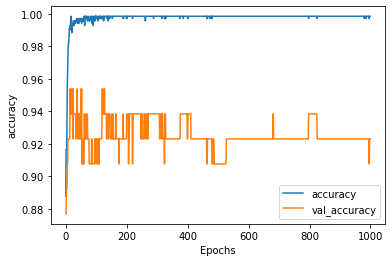

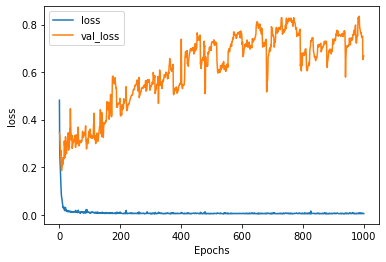

In [361]:
# Training an LSTM with including a Flatten layer
inputs = layers.Input(shape=(max_cap,))
#e=layers.Embedding(len(word_dict)+1, max_cap, input_length=max_cap)(inputs)
e=layers.Embedding(len(word_dict)+1, 128)(inputs)
emb=layers.Flatten()(e) 
h=layers.LSTM(128, dropout=0.8, recurrent_dropout=0.8)(e)
outputs=layers.Dense(2, activation='sigmoid')(h)
model_LSTM_T = models.Model(inputs, outputs= outputs)

model_LSTM_T.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_LSTM_T = model_LSTM_T.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=1000,
          validation_data=(x_test, y_test))

score, acc = model_LSTM_T.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test accuracy:', acc)

plot_graphs(history_LSTM_T, "accuracy")
plot_graphs(history_LSTM_T, "loss")

Epoch 1/1000
44/44 [==============================] - 1s 14ms/step - loss: 0.4553 - accuracy: 0.9050 - val_loss: 0.3709 - val_accuracy: 0.8769
Epoch 2/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.3079 - accuracy: 0.9165 - val_loss: 0.3682 - val_accuracy: 0.8769
Epoch 3/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.2908 - accuracy: 0.9165 - val_loss: 0.3661 - val_accuracy: 0.8769
Epoch 4/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.2694 - accuracy: 0.9165 - val_loss: 0.3950 - val_accuracy: 0.8769
Epoch 5/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.2700 - accuracy: 0.9165 - val_loss: 0.3560 - val_accuracy: 0.8769
Epoch 6/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.2474 - accuracy: 0.9165 - val_loss: 0.3210 - val_accuracy: 0.8769
Epoch 7/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.2170 - accuracy: 0.9165 - val_loss: 0.2914 - val_accuracy: 0.8769
Epoch

44/44 [==============================] - 0s 8ms/step - loss: 0.0216 - accuracy: 0.9942 - val_loss: 0.6444 - val_accuracy: 0.9077
Epoch 116/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0231 - accuracy: 0.9928 - val_loss: 0.6405 - val_accuracy: 0.8923
Epoch 117/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0271 - accuracy: 0.9899 - val_loss: 0.6994 - val_accuracy: 0.9077
Epoch 118/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0331 - accuracy: 0.9914 - val_loss: 0.6129 - val_accuracy: 0.8923
Epoch 119/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0290 - accuracy: 0.9885 - val_loss: 0.6059 - val_accuracy: 0.8923
Epoch 120/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0325 - accuracy: 0.9871 - val_loss: 0.5878 - val_accuracy: 0.8923
Epoch 121/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0421 - accuracy: 0.9842 - val_loss: 0.5884 - val_accuracy: 0.8923
Epoch 1

Epoch 172/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0304 - accuracy: 0.9885 - val_loss: 0.6455 - val_accuracy: 0.8923
Epoch 173/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0219 - accuracy: 0.9914 - val_loss: 0.6708 - val_accuracy: 0.8923
Epoch 174/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0200 - accuracy: 0.9928 - val_loss: 0.6524 - val_accuracy: 0.8923
Epoch 175/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0256 - accuracy: 0.9885 - val_loss: 0.6234 - val_accuracy: 0.8923
Epoch 176/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0207 - accuracy: 0.9957 - val_loss: 0.6742 - val_accuracy: 0.8923
Epoch 177/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0361 - accuracy: 0.9928 - val_loss: 0.5796 - val_accuracy: 0.8923
Epoch 178/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0154 - accuracy: 0.9942 - val_loss: 0.6007 - val_accuracy:

Epoch 285/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0184 - accuracy: 0.9957 - val_loss: 0.6614 - val_accuracy: 0.9077
Epoch 286/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0147 - accuracy: 0.9942 - val_loss: 0.6466 - val_accuracy: 0.8923
Epoch 287/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0116 - accuracy: 0.9957 - val_loss: 0.6516 - val_accuracy: 0.8923
Epoch 288/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0177 - accuracy: 0.9928 - val_loss: 0.6141 - val_accuracy: 0.9077
Epoch 289/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0186 - accuracy: 0.9914 - val_loss: 0.6292 - val_accuracy: 0.8923
Epoch 290/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0144 - accuracy: 0.9942 - val_loss: 0.6210 - val_accuracy: 0.9077
Epoch 291/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0172 - accuracy: 0.9957 - val_loss: 0.7005 - val_accuracy:

Epoch 342/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0113 - accuracy: 0.9971 - val_loss: 0.7234 - val_accuracy: 0.8923
Epoch 343/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0162 - accuracy: 0.9971 - val_loss: 0.7345 - val_accuracy: 0.8923
Epoch 344/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0158 - accuracy: 0.9957 - val_loss: 0.7543 - val_accuracy: 0.8923
Epoch 345/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0165 - accuracy: 0.9914 - val_loss: 0.7168 - val_accuracy: 0.8923
Epoch 346/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0182 - accuracy: 0.9928 - val_loss: 0.6800 - val_accuracy: 0.8923
Epoch 347/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0263 - accuracy: 0.9942 - val_loss: 0.6260 - val_accuracy: 0.8923
Epoch 348/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0167 - accuracy: 0.9942 - val_loss: 0.6470 - val_accuracy:

Epoch 399/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0135 - accuracy: 0.9986 - val_loss: 0.6522 - val_accuracy: 0.9077
Epoch 400/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0143 - accuracy: 0.9957 - val_loss: 0.6019 - val_accuracy: 0.9231
Epoch 401/1000
44/44 [==============================] - 0s 8ms/step - loss: 0.0136 - accuracy: 0.9971 - val_loss: 0.6493 - val_accuracy: 0.9231
Epoch 402/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0117 - accuracy: 0.9957 - val_loss: 0.6429 - val_accuracy: 0.9231
Epoch 403/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0143 - accuracy: 0.9957 - val_loss: 0.6119 - val_accuracy: 0.9077
Epoch 404/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0119 - accuracy: 0.9971 - val_loss: 0.6403 - val_accuracy: 0.9231
Epoch 405/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0136 - accuracy: 0.9957 - val_loss: 0.6489 - val_accuracy:

Epoch 456/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0181 - accuracy: 0.9957 - val_loss: 0.6675 - val_accuracy: 0.8923
Epoch 457/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0174 - accuracy: 0.9957 - val_loss: 0.6296 - val_accuracy: 0.8923
Epoch 458/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0132 - accuracy: 0.9942 - val_loss: 0.6617 - val_accuracy: 0.8923
Epoch 459/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0120 - accuracy: 0.9957 - val_loss: 0.6640 - val_accuracy: 0.9077
Epoch 460/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0180 - accuracy: 0.9928 - val_loss: 0.6238 - val_accuracy: 0.9077
Epoch 461/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0119 - accuracy: 0.9942 - val_loss: 0.6371 - val_accuracy: 0.9077
Epoch 462/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0209 - accuracy: 0.9914 - val_loss: 0.6020 - val_accuracy:

Epoch 513/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0117 - accuracy: 0.9986 - val_loss: 0.6913 - val_accuracy: 0.9077
Epoch 514/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0105 - accuracy: 0.9971 - val_loss: 0.7156 - val_accuracy: 0.9077
Epoch 515/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0180 - accuracy: 0.9942 - val_loss: 0.6818 - val_accuracy: 0.9077
Epoch 516/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0136 - accuracy: 0.9957 - val_loss: 0.6900 - val_accuracy: 0.9077
Epoch 517/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0126 - accuracy: 0.9957 - val_loss: 0.6522 - val_accuracy: 0.9077
Epoch 518/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0175 - accuracy: 0.9928 - val_loss: 0.5922 - val_accuracy: 0.9077
Epoch 519/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0140 - accuracy: 0.9957 - val_loss: 0.6952 - val_accuracy:

Epoch 570/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0154 - accuracy: 0.9957 - val_loss: 0.6164 - val_accuracy: 0.9231
Epoch 571/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0103 - accuracy: 0.9971 - val_loss: 0.6283 - val_accuracy: 0.9231
Epoch 572/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0144 - accuracy: 0.9942 - val_loss: 0.6548 - val_accuracy: 0.9077
Epoch 573/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0126 - accuracy: 0.9957 - val_loss: 0.6330 - val_accuracy: 0.9231
Epoch 574/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0134 - accuracy: 0.9942 - val_loss: 0.6450 - val_accuracy: 0.9231
Epoch 575/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0111 - accuracy: 0.9957 - val_loss: 0.6416 - val_accuracy: 0.9077
Epoch 576/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0167 - accuracy: 0.9942 - val_loss: 0.6100 - val_accuracy:

Epoch 683/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0154 - accuracy: 0.9942 - val_loss: 0.7083 - val_accuracy: 0.9077
Epoch 684/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0152 - accuracy: 0.9928 - val_loss: 0.7043 - val_accuracy: 0.9077
Epoch 685/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0107 - accuracy: 0.9986 - val_loss: 0.6890 - val_accuracy: 0.9077
Epoch 686/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0133 - accuracy: 0.9957 - val_loss: 0.7033 - val_accuracy: 0.9077
Epoch 687/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0102 - accuracy: 0.9971 - val_loss: 0.7114 - val_accuracy: 0.9077
Epoch 688/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0161 - accuracy: 0.9971 - val_loss: 0.7057 - val_accuracy: 0.9077
Epoch 689/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0167 - accuracy: 0.9899 - val_loss: 0.6948 - val_accuracy:

Epoch 796/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0091 - accuracy: 0.9971 - val_loss: 0.7157 - val_accuracy: 0.9231
Epoch 797/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0132 - accuracy: 0.9957 - val_loss: 0.7311 - val_accuracy: 0.9231
Epoch 798/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0113 - accuracy: 0.9971 - val_loss: 0.6973 - val_accuracy: 0.9385
Epoch 799/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0112 - accuracy: 0.9957 - val_loss: 0.7026 - val_accuracy: 0.9231
Epoch 800/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0126 - accuracy: 0.9942 - val_loss: 0.7785 - val_accuracy: 0.9231
Epoch 801/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0133 - accuracy: 0.9957 - val_loss: 0.7233 - val_accuracy: 0.9231
Epoch 802/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0139 - accuracy: 0.9957 - val_loss: 0.7636 - val_accuracy:

Epoch 909/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0103 - accuracy: 0.9957 - val_loss: 0.7493 - val_accuracy: 0.9231
Epoch 910/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0089 - accuracy: 0.9971 - val_loss: 0.7333 - val_accuracy: 0.9231
Epoch 911/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0130 - accuracy: 0.9942 - val_loss: 0.7321 - val_accuracy: 0.9231
Epoch 912/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0105 - accuracy: 0.9971 - val_loss: 0.7202 - val_accuracy: 0.9231
Epoch 913/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0117 - accuracy: 0.9971 - val_loss: 0.7333 - val_accuracy: 0.9231
Epoch 914/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0119 - accuracy: 0.9957 - val_loss: 0.7075 - val_accuracy: 0.9231
Epoch 915/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0107 - accuracy: 0.9971 - val_loss: 0.7195 - val_accuracy:

Epoch 966/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0083 - accuracy: 0.9971 - val_loss: 0.6899 - val_accuracy: 0.9231
Epoch 967/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0132 - accuracy: 0.9957 - val_loss: 0.6995 - val_accuracy: 0.9231
Epoch 968/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0122 - accuracy: 0.9942 - val_loss: 0.6926 - val_accuracy: 0.9231
Epoch 969/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0114 - accuracy: 0.9957 - val_loss: 0.6985 - val_accuracy: 0.9231
Epoch 970/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0108 - accuracy: 0.9971 - val_loss: 0.6923 - val_accuracy: 0.9231
Epoch 971/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0102 - accuracy: 0.9971 - val_loss: 0.6819 - val_accuracy: 0.9077
Epoch 972/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0092 - accuracy: 0.9971 - val_loss: 0.7176 - val_accuracy:

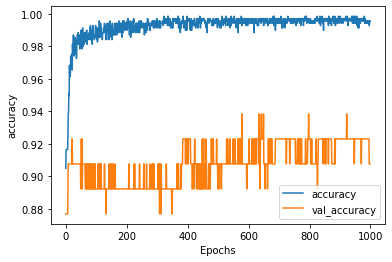

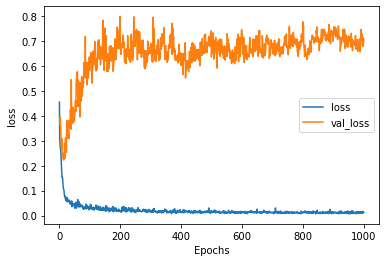

In [362]:
# Program that uses and embedding layer and an GRU to learn some sentiment analysis from product reviews.
batch_size = 16
inputs = layers.Input(shape=(max_cap,))
e=layers.Embedding(len(word_dict)+1, max_cap, input_length=max_cap)(inputs)
h=layers.GRU(128, dropout=0.8, recurrent_dropout=0.8)(e)
outputs=layers.Dense(2, activation='sigmoid')(h)
model_GRU = models.Model(inputs, outputs)

model_GRU.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_GRU = model_GRU.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=1000,
          validation_data=(x_test, y_test))

score, acc = model_GRU.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test accuracy:', acc)

plot_graphs(history_GRU, "accuracy")
plot_graphs(history_GRU, "loss")

Epoch 1/1000
44/44 [==============================] - 1s 19ms/step - loss: 0.4346 - accuracy: 0.9050 - val_loss: 0.3551 - val_accuracy: 0.8769
Epoch 2/1000
44/44 [==============================] - 1s 12ms/step - loss: 0.2691 - accuracy: 0.9165 - val_loss: 0.3419 - val_accuracy: 0.8769
Epoch 3/1000
44/44 [==============================] - 1s 12ms/step - loss: 0.2355 - accuracy: 0.9165 - val_loss: 0.3038 - val_accuracy: 0.8769
Epoch 4/1000
44/44 [==============================] - 1s 12ms/step - loss: 0.1971 - accuracy: 0.9180 - val_loss: 0.2655 - val_accuracy: 0.8923
Epoch 5/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.1639 - accuracy: 0.9266 - val_loss: 0.2343 - val_accuracy: 0.8923
Epoch 6/1000
44/44 [==============================] - 1s 13ms/step - loss: 0.1151 - accuracy: 0.9554 - val_loss: 0.2404 - val_accuracy: 0.9077
Epoch 7/1000
44/44 [==============================] - 1s 12ms/step - loss: 0.0931 - accuracy: 0.9655 - val_loss: 0.1966 - val_accuracy: 0.9231

Epoch 58/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0101 - accuracy: 0.9986 - val_loss: 0.3484 - val_accuracy: 0.9231
Epoch 59/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0107 - accuracy: 0.9971 - val_loss: 0.3823 - val_accuracy: 0.9231
Epoch 60/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0151 - accuracy: 0.9971 - val_loss: 0.3704 - val_accuracy: 0.9077
Epoch 61/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0112 - accuracy: 0.9971 - val_loss: 0.3728 - val_accuracy: 0.8923
Epoch 62/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0175 - accuracy: 0.9942 - val_loss: 0.3785 - val_accuracy: 0.9077
Epoch 63/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0164 - accuracy: 0.9957 - val_loss: 0.3567 - val_accuracy: 0.9077
Epoch 64/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0126 - accuracy: 0.9957 - val_loss: 0.3511 - val_accuracy:

Epoch 115/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0113 - accuracy: 0.9986 - val_loss: 0.4073 - val_accuracy: 0.9231
Epoch 116/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0133 - accuracy: 0.9957 - val_loss: 0.4230 - val_accuracy: 0.9077
Epoch 117/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0081 - accuracy: 0.9971 - val_loss: 0.4887 - val_accuracy: 0.8923
Epoch 118/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0105 - accuracy: 0.9986 - val_loss: 0.4603 - val_accuracy: 0.8923
Epoch 119/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0079 - accuracy: 0.9971 - val_loss: 0.5012 - val_accuracy: 0.9077
Epoch 120/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0102 - accuracy: 0.9971 - val_loss: 0.4822 - val_accuracy: 0.9077
Epoch 121/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0098 - accuracy: 0.9986 - val_loss: 0.4276 - val_ac

44/44 [==============================] - 1s 12ms/step - loss: 0.0072 - accuracy: 0.9971 - val_loss: 0.5294 - val_accuracy: 0.9077
Epoch 228/1000
44/44 [==============================] - 1s 13ms/step - loss: 0.0068 - accuracy: 0.9986 - val_loss: 0.5421 - val_accuracy: 0.9231
Epoch 229/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0066 - accuracy: 0.9986 - val_loss: 0.5683 - val_accuracy: 0.9231
Epoch 230/1000
44/44 [==============================] - 1s 11ms/step - loss: 0.0031 - accuracy: 0.9986 - val_loss: 0.5694 - val_accuracy: 0.9231
Epoch 231/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0.6061 - val_accuracy: 0.9231
Epoch 232/1000
44/44 [==============================] - 1s 12ms/step - loss: 0.0036 - accuracy: 0.9986 - val_loss: 0.6065 - val_accuracy: 0.9231
Epoch 233/1000
44/44 [==============================] - 1s 11ms/step - loss: 0.0074 - accuracy: 0.9986 - val_loss: 0.5767 - val_accuracy: 0.9231


44/44 [==============================] - 0s 11ms/step - loss: 0.0056 - accuracy: 0.9986 - val_loss: 0.6286 - val_accuracy: 0.9231
Epoch 340/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0064 - accuracy: 0.9986 - val_loss: 0.6275 - val_accuracy: 0.9231
Epoch 341/1000
44/44 [==============================] - 1s 12ms/step - loss: 0.0052 - accuracy: 0.9986 - val_loss: 0.6227 - val_accuracy: 0.9231
Epoch 342/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0068 - accuracy: 0.9986 - val_loss: 0.6111 - val_accuracy: 0.9231
Epoch 343/1000
44/44 [==============================] - 1s 12ms/step - loss: 0.0054 - accuracy: 0.9986 - val_loss: 0.6015 - val_accuracy: 0.9231
Epoch 344/1000
44/44 [==============================] - 1s 12ms/step - loss: 0.0059 - accuracy: 0.9986 - val_loss: 0.6068 - val_accuracy: 0.9231
Epoch 345/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0062 - accuracy: 0.9986 - val_loss: 0.6089 - val_accuracy: 0.9231


44/44 [==============================] - 1s 11ms/step - loss: 0.0036 - accuracy: 0.9986 - val_loss: 0.5959 - val_accuracy: 0.9231
Epoch 452/1000
44/44 [==============================] - 1s 12ms/step - loss: 0.0052 - accuracy: 0.9986 - val_loss: 0.5904 - val_accuracy: 0.9231
Epoch 453/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0073 - accuracy: 0.9971 - val_loss: 0.5294 - val_accuracy: 0.9231
Epoch 454/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0065 - accuracy: 0.9986 - val_loss: 0.5239 - val_accuracy: 0.9231
Epoch 455/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0060 - accuracy: 0.9986 - val_loss: 0.5274 - val_accuracy: 0.9231
Epoch 456/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0073 - accuracy: 0.9986 - val_loss: 0.5437 - val_accuracy: 0.9231
Epoch 457/1000
44/44 [==============================] - 1s 12ms/step - loss: 0.0054 - accuracy: 0.9986 - val_loss: 0.5242 - val_accuracy: 0.9231


44/44 [==============================] - 0s 11ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 0.7002 - val_accuracy: 0.9231
Epoch 564/1000
44/44 [==============================] - 1s 11ms/step - loss: 0.0036 - accuracy: 0.9986 - val_loss: 0.7126 - val_accuracy: 0.9231
Epoch 565/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0066 - accuracy: 0.9986 - val_loss: 0.7067 - val_accuracy: 0.9231
Epoch 566/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0115 - accuracy: 0.9971 - val_loss: 0.6890 - val_accuracy: 0.9231
Epoch 567/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0064 - accuracy: 0.9986 - val_loss: 0.6643 - val_accuracy: 0.9231
Epoch 568/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0052 - accuracy: 0.9986 - val_loss: 0.6591 - val_accuracy: 0.9231
Epoch 569/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0062 - accuracy: 0.9986 - val_loss: 0.6539 - val_accuracy: 0.9231


44/44 [==============================] - 0s 11ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.6073 - val_accuracy: 0.9231
Epoch 676/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 0.6184 - val_accuracy: 0.9231
Epoch 677/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.6271 - val_accuracy: 0.9231
Epoch 678/1000
44/44 [==============================] - 1s 11ms/step - loss: 0.0040 - accuracy: 0.9986 - val_loss: 0.6352 - val_accuracy: 0.9231
Epoch 679/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.6418 - val_accuracy: 0.9231
Epoch 680/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0053 - accuracy: 0.9986 - val_loss: 0.6440 - val_accuracy: 0.9231
Epoch 681/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0052 - accuracy: 0.9986 - val_loss: 0.6429 - val_accuracy: 0.9231


44/44 [==============================] - 0s 11ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 0.6138 - val_accuracy: 0.9231
Epoch 788/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0061 - accuracy: 0.9986 - val_loss: 0.6344 - val_accuracy: 0.9231
Epoch 789/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0041 - accuracy: 0.9986 - val_loss: 0.6367 - val_accuracy: 0.9231
Epoch 790/1000
44/44 [==============================] - 1s 13ms/step - loss: 0.0066 - accuracy: 0.9986 - val_loss: 0.6340 - val_accuracy: 0.9231
Epoch 791/1000
44/44 [==============================] - 1s 12ms/step - loss: 0.0055 - accuracy: 0.9986 - val_loss: 0.6435 - val_accuracy: 0.9231
Epoch 792/1000
44/44 [==============================] - 1s 11ms/step - loss: 0.0059 - accuracy: 0.9986 - val_loss: 0.6417 - val_accuracy: 0.9231
Epoch 793/1000
44/44 [==============================] - 1s 12ms/step - loss: 0.0059 - accuracy: 0.9986 - val_loss: 0.6375 - val_accuracy: 0.9231


44/44 [==============================] - 0s 11ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.7157 - val_accuracy: 0.9231
Epoch 900/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 0.7117 - val_accuracy: 0.9231
Epoch 901/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0035 - accuracy: 0.9986 - val_loss: 0.7169 - val_accuracy: 0.9231
Epoch 902/1000
44/44 [==============================] - 0s 11ms/step - loss: 0.0055 - accuracy: 0.9986 - val_loss: 0.7206 - val_accuracy: 0.9231
Epoch 903/1000
44/44 [==============================] - 1s 12ms/step - loss: 0.0033 - accuracy: 0.9986 - val_loss: 0.7142 - val_accuracy: 0.9231
Epoch 904/1000
44/44 [==============================] - 1s 12ms/step - loss: 0.0054 - accuracy: 0.9986 - val_loss: 0.7054 - val_accuracy: 0.9231
Epoch 905/1000
44/44 [==============================] - 1s 12ms/step - loss: 0.0057 - accuracy: 0.9986 - val_loss: 0.7209 - val_accuracy: 0.9231


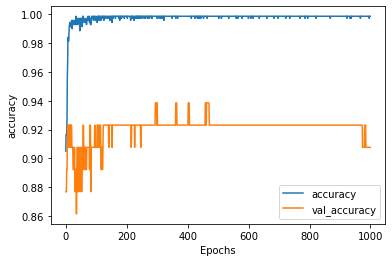

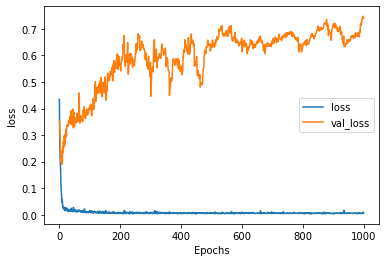

In [363]:
# Training an GRU with including a Flatten layer
inputs = layers.Input(shape=(max_cap,))
e=layers.Embedding(len(word_dict)+1, 128)(inputs)
emb=layers.Flatten()(e) 
h=layers.GRU(128, dropout=0.8, recurrent_dropout=0.8)(e)
outputs=layers.Dense(2, activation='sigmoid')(h)
model_GRU_T = models.Model(inputs, outputs= outputs)

model_GRU_T.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_GRU_T = model_GRU_T.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=1000,
          validation_data=(x_test, y_test))

score, acc = model_GRU_T.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test accuracy:', acc)

plot_graphs(history_GRU_T, "accuracy")
plot_graphs(history_GRU_T, "loss")

Epoch 1/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.5249 - accuracy: 0.8662 - val_loss: 0.2887 - val_accuracy: 0.8769
Epoch 2/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.2112 - accuracy: 0.9180 - val_loss: 0.2450 - val_accuracy: 0.8923
Epoch 3/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.1243 - accuracy: 0.9439 - val_loss: 0.2420 - val_accuracy: 0.9077
Epoch 4/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0757 - accuracy: 0.9755 - val_loss: 0.2465 - val_accuracy: 0.9077
Epoch 5/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0314 - accuracy: 0.9957 - val_loss: 0.2697 - val_accuracy: 0.8923
Epoch 6/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0205 - accuracy: 0.9942 - val_loss: 0.2922 - val_accuracy: 0.8923
Epoch 7/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0157 - accuracy: 0.9942 - val_loss: 0.3267 - val_accuracy: 0.8923
Epoch 

44/44 [==============================] - 0s 5ms/step - loss: 0.0056 - accuracy: 0.9986 - val_loss: 0.7941 - val_accuracy: 0.8154
Epoch 116/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0054 - accuracy: 0.9986 - val_loss: 0.7977 - val_accuracy: 0.8154
Epoch 117/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0052 - accuracy: 0.9986 - val_loss: 0.7980 - val_accuracy: 0.8154
Epoch 118/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0053 - accuracy: 0.9986 - val_loss: 0.7970 - val_accuracy: 0.8154
Epoch 119/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0054 - accuracy: 0.9986 - val_loss: 0.8014 - val_accuracy: 0.8154
Epoch 120/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0055 - accuracy: 0.9986 - val_loss: 0.8073 - val_accuracy: 0.8154
Epoch 121/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0067 - accuracy: 0.9986 - val_loss: 0.8512 - val_accuracy: 0.8000
Epoch 1

Epoch 172/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0052 - accuracy: 0.9986 - val_loss: 0.9439 - val_accuracy: 0.7846
Epoch 173/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0056 - accuracy: 0.9986 - val_loss: 0.9451 - val_accuracy: 0.7846
Epoch 174/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0055 - accuracy: 0.9986 - val_loss: 0.9460 - val_accuracy: 0.7846
Epoch 175/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0053 - accuracy: 0.9986 - val_loss: 0.9499 - val_accuracy: 0.7846
Epoch 176/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 0.9986 - val_loss: 0.9510 - val_accuracy: 0.7846
Epoch 177/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0054 - accuracy: 0.9986 - val_loss: 0.9523 - val_accuracy: 0.7846
Epoch 178/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0053 - accuracy: 0.9986 - val_loss: 0.9549 - val_accuracy:

Epoch 229/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 1.0484 - val_accuracy: 0.8308
Epoch 230/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 1.0491 - val_accuracy: 0.8308
Epoch 231/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 1.0514 - val_accuracy: 0.8308
Epoch 232/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 0.9986 - val_loss: 1.0568 - val_accuracy: 0.8308
Epoch 233/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0052 - accuracy: 0.9986 - val_loss: 1.0619 - val_accuracy: 0.8308
Epoch 234/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 1.0621 - val_accuracy: 0.8308
Epoch 235/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 1.0557 - val_accuracy:

Epoch 286/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 1.3006 - val_accuracy: 0.8000
Epoch 287/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 1.3084 - val_accuracy: 0.8000
Epoch 288/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 1.3187 - val_accuracy: 0.8000
Epoch 289/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 1.3179 - val_accuracy: 0.8000
Epoch 290/1000
44/44 [==============================] - 0s 7ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 1.3256 - val_accuracy: 0.8000
Epoch 291/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 1.3300 - val_accuracy: 0.8000
Epoch 292/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 1.3268 - val_accuracy:

Epoch 343/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 1.7278 - val_accuracy: 0.7538
Epoch 344/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 1.7330 - val_accuracy: 0.7538
Epoch 345/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 1.7283 - val_accuracy: 0.7538
Epoch 346/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 1.7325 - val_accuracy: 0.7538
Epoch 347/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 1.7470 - val_accuracy: 0.7538
Epoch 348/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 1.7599 - val_accuracy: 0.7385
Epoch 349/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 1.7562 - val_accuracy:

Epoch 400/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 2.1780 - val_accuracy: 0.7231
Epoch 401/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 2.1612 - val_accuracy: 0.7385
Epoch 402/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 2.1651 - val_accuracy: 0.7385
Epoch 403/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 2.1572 - val_accuracy: 0.7385
Epoch 404/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 2.1685 - val_accuracy: 0.7385
Epoch 405/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 2.1784 - val_accuracy: 0.7385
Epoch 406/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 2.1980 - val_accuracy:

Epoch 457/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 1.9237 - val_accuracy: 0.7846
Epoch 458/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 1.9253 - val_accuracy: 0.7846
Epoch 459/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 1.9248 - val_accuracy: 0.7846
Epoch 460/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 1.9265 - val_accuracy: 0.7846
Epoch 461/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 1.9261 - val_accuracy: 0.7846
Epoch 462/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 1.9241 - val_accuracy: 0.7846
Epoch 463/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 1.9255 - val_accuracy:

Epoch 514/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 2.0400 - val_accuracy: 0.7846
Epoch 515/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 2.0388 - val_accuracy: 0.8000
Epoch 516/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 2.0375 - val_accuracy: 0.8000
Epoch 517/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 2.0376 - val_accuracy: 0.8000
Epoch 518/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 2.0422 - val_accuracy: 0.8000
Epoch 519/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 2.0499 - val_accuracy: 0.8000
Epoch 520/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 2.0542 - val_accuracy:

Epoch 571/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 2.3490 - val_accuracy: 0.7385
Epoch 572/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 2.3489 - val_accuracy: 0.7385
Epoch 573/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 2.3488 - val_accuracy: 0.7385
Epoch 574/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 2.3487 - val_accuracy: 0.7385
Epoch 575/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 2.3486 - val_accuracy: 0.7385
Epoch 576/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 2.3485 - val_accuracy: 0.7385
Epoch 577/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 2.3492 - val_accuracy:

Epoch 628/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 2.3674 - val_accuracy: 0.7538
Epoch 629/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 2.3681 - val_accuracy: 0.7538
Epoch 630/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 2.3668 - val_accuracy: 0.7538
Epoch 631/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 2.3681 - val_accuracy: 0.7538
Epoch 632/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 2.3690 - val_accuracy: 0.7538
Epoch 633/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 2.3708 - val_accuracy: 0.7538
Epoch 634/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 2.3703 - val_accuracy:

Epoch 685/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 2.4051 - val_accuracy: 0.7538
Epoch 686/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 2.4069 - val_accuracy: 0.7538
Epoch 687/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 2.4062 - val_accuracy: 0.7538
Epoch 688/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 2.4092 - val_accuracy: 0.7538
Epoch 689/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0050 - accuracy: 0.9986 - val_loss: 2.3973 - val_accuracy: 0.7538
Epoch 690/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0056 - accuracy: 0.9986 - val_loss: 2.3743 - val_accuracy: 0.7538
Epoch 691/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0078 - accuracy: 0.9986 - val_loss: 2.6037 - val_accuracy:

Epoch 742/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 2.7651 - val_accuracy: 0.7385
Epoch 743/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 2.7674 - val_accuracy: 0.7385
Epoch 744/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 2.7684 - val_accuracy: 0.7385
Epoch 745/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 2.7698 - val_accuracy: 0.7385
Epoch 746/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 2.7712 - val_accuracy: 0.7385
Epoch 747/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 2.7727 - val_accuracy: 0.7385
Epoch 748/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 2.7741 - val_accuracy:

Epoch 799/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 2.7110 - val_accuracy: 0.7538
Epoch 800/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 2.7142 - val_accuracy: 0.7538
Epoch 801/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 2.7143 - val_accuracy: 0.7538
Epoch 802/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 2.7150 - val_accuracy: 0.7538
Epoch 803/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 2.7160 - val_accuracy: 0.7538
Epoch 804/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 2.7160 - val_accuracy: 0.7538
Epoch 805/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 2.7162 - val_accuracy:

Epoch 856/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 3.8585 - val_accuracy: 0.7231
Epoch 857/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 3.8609 - val_accuracy: 0.7231
Epoch 858/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 3.8581 - val_accuracy: 0.7231
Epoch 859/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 3.8556 - val_accuracy: 0.7231
Epoch 860/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 3.8552 - val_accuracy: 0.7231
Epoch 861/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 3.8594 - val_accuracy: 0.7231
Epoch 862/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 3.8582 - val_accuracy:

Epoch 913/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 3.7236 - val_accuracy: 0.7385
Epoch 914/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 3.7100 - val_accuracy: 0.7385
Epoch 915/1000
44/44 [==============================] - 0s 6ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 3.7045 - val_accuracy: 0.7385
Epoch 916/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 3.7033 - val_accuracy: 0.7385
Epoch 917/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 3.7007 - val_accuracy: 0.7385
Epoch 918/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 0.9986 - val_loss: 3.7029 - val_accuracy: 0.7385
Epoch 919/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 3.7003 - val_accuracy:

Epoch 970/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 3.6321 - val_accuracy: 0.7385
Epoch 971/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 3.6371 - val_accuracy: 0.7385
Epoch 972/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 3.6414 - val_accuracy: 0.7385
Epoch 973/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 3.6442 - val_accuracy: 0.7385
Epoch 974/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 3.6469 - val_accuracy: 0.7385
Epoch 975/1000
44/44 [==============================] - 0s 5ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 3.6490 - val_accuracy: 0.7385
Epoch 976/1000
44/44 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 3.6529 - val_accuracy:

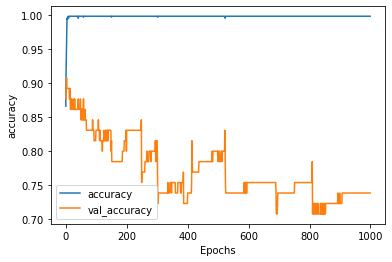

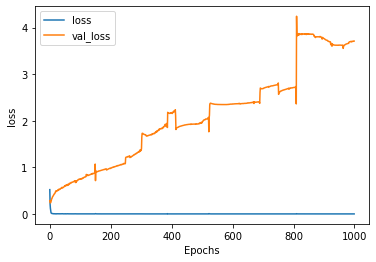

In [364]:
# Training with Dense Layer including a Flatten layer
inputs = layers.Input(shape=(max_cap,))
e =layers.Embedding(len(word_dict)+1, 128)(inputs)
emb=layers.Flatten()(e)
h=layers.Dense(128, activation = "relu" )(emb)
outputs=layers.Dense(2, activation='sigmoid',)(h)
model_Dense_T = models.Model(inputs, outputs)

model_Dense_T.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_Dense = model_Dense_T.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=1000,
          validation_data=(x_test, y_test))

score, acc = model_Dense_T.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test accuracy:', acc)

plot_graphs(history_Dense, "accuracy")
plot_graphs(history_Dense, "loss")

# Calculating pairwise distance of words from the vocabulary in embedding space.

In [365]:
weights = model_LSTM_T.get_weights()[0]

# Taking the embeddings from all words
x = weights[sequence_dict['easy']-1]
y = weights[sequence_dict['hard']-1]
z = weights[sequence_dict['happy']-1]
a = weights[sequence_dict['sadly']-1]

# Printing distances between words
print("Distance between {good} and {bad} in LSTM is : "+str(distance.euclidean(x, y)))
print("Distance between {bad} and {happy} in LSTM is : "+str(distance.euclidean(y, z)))
print("Distance between {happy} and {sadly} in LSTM is : "+str(distance.euclidean(z, a)))
print("Distance between {sadly} and {good} in LSTM is : "+str(distance.euclidean(x, a)))

Distance between {good} and {bad} in LSTM is : 3.1519455909729004
Distance between {bad} and {happy} in LSTM is : 1.1890476942062378
Distance between {happy} and {sadly} in LSTM is : 1.2307151556015015
Distance between {sadly} and {good} in LSTM is : 3.1261558532714844


# GloVe: Global Vectors for Word Representation

GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

In [366]:
# Using Global Vectors for Word Representation for calculating the word distances in the embedding space
glove = torchtext.vocab.GloVe(name="6B", # trained on Wikipedia 2014 corpus
                              dim=50)   # embedding size = 100

In [367]:
glove['hard']

tensor([-0.5308, -0.2197,  0.5327, -0.2314,  0.0743, -0.0655, -0.1042,  0.3072,
        -0.4964,  0.6537, -0.3848, -0.1626, -0.6452,  0.3677,  0.0895,  0.3313,
         0.7255, -0.0513,  0.3686, -0.8990, -0.5323,  0.3354,  0.1941,  0.1839,
         0.5277, -1.8321, -0.5357,  0.1196,  0.8731, -0.4091,  3.5748,  0.1680,
        -0.2698,  0.1895, -0.1553,  0.2306, -0.3075,  0.4440,  0.1433, -0.5658,
        -0.1302,  0.2943, -0.0526,  0.4033,  0.4579,  0.3516, -0.0197, -0.2006,
        -0.2473, -0.0306])

In [368]:
glove['happy']

tensor([ 0.0921,  0.2571, -0.5869, -0.3703,  1.0828, -0.5547, -0.7814,  0.5870,
        -0.5871,  0.4632, -0.1127,  0.2606, -0.2693, -0.0725,  1.2470,  0.3057,
         0.5673,  0.3051, -0.0503, -0.6444, -0.5451,  0.8643,  0.2091,  0.5633,
         1.1228, -1.0516, -0.7811,  0.2966,  0.7261, -0.6139,  2.4225,  1.0142,
        -0.1775,  0.4147, -0.1297, -0.4706,  0.3807,  0.1631, -0.3230, -0.7790,
        -0.4247, -0.3083, -0.4224,  0.0551,  0.3827,  0.0374, -0.4302, -0.3944,
         0.1051,  0.8729])

In [369]:
x = glove['easy']
y = glove['hard']
z = glove['happy']
a = glove['sadly']

# Printing distances between words
print("Distance between {good} and {bad} in LSTM is : "+str((torch.norm(y - x))))
print("Distance between {bad} and {happy} in LSTM is : "+str((torch.norm(z - y))))
print("Distance between {happy} and {sadly} in LSTM is : "+str((torch.norm(a - z))))
print("Distance between {sadly} and {good} in LSTM is : "+str((torch.norm(x - a))))

Distance between {good} and {bad} in LSTM is : tensor(2.5453)
Distance between {bad} and {happy} in LSTM is : tensor(3.5998)
Distance between {happy} and {sadly} in LSTM is : tensor(3.4765)
Distance between {sadly} and {good} in LSTM is : tensor(4.4945)


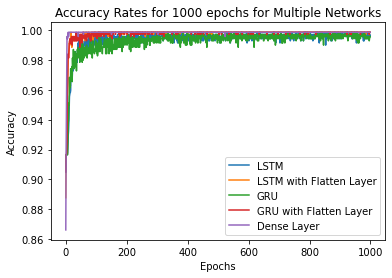

In [370]:
plt.plot(history_LSTM.history['accuracy'])
plt.plot(history_LSTM_T.history['accuracy'])
plt.plot(history_GRU.history['accuracy'])
plt.plot(history_GRU_T.history['accuracy'])
plt.plot(history_Dense.history['accuracy'])

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["LSTM", "LSTM with Flatten Layer","GRU","GRU with Flatten Layer", "Dense Layer" ])
plt.title("Accuracy Rates for 1000 epochs for Multiple Networks")
plt.show()

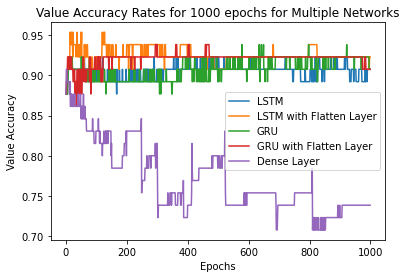

In [371]:
plt.plot(history_LSTM.history['val_accuracy'])
plt.plot(history_LSTM_T.history['val_accuracy'])
plt.plot(history_GRU.history['val_accuracy'])
plt.plot(history_GRU_T.history['val_accuracy'])
plt.plot(history_Dense.history['val_accuracy'])

plt.xlabel("Epochs")
plt.ylabel("Value Accuracy")
plt.legend(["LSTM", "LSTM with Flatten Layer","GRU","GRU with Flatten Layer", "Dense Layer" ])
plt.title("Value Accuracy Rates for 1000 epochs for Multiple Networks")
plt.show()

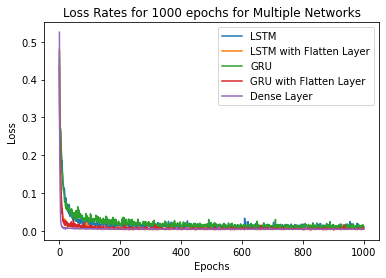

In [372]:
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM_T.history['loss'])
plt.plot(history_GRU.history['loss'])
plt.plot(history_GRU_T.history['loss'])
plt.plot(history_Dense.history['loss'])

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["LSTM", "LSTM with Flatten Layer","GRU","GRU with Flatten Layer", "Dense Layer" ])
plt.title("Loss Rates for 1000 epochs for Multiple Networks")
plt.show()

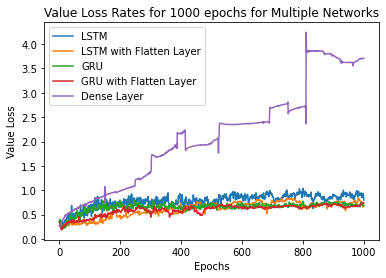

In [373]:
plt.plot(history_LSTM.history['val_loss'])
plt.plot(history_LSTM_T.history['val_loss'])
plt.plot(history_GRU.history['val_loss'])
plt.plot(history_GRU_T.history['val_loss'])
plt.plot(history_Dense.history['val_loss'])

plt.xlabel("Epochs")
plt.ylabel("Value Loss")
plt.legend(["LSTM", "LSTM with Flatten Layer","GRU","GRU with Flatten Layer", "Dense Layer" ])
plt.title("Value Loss Rates for 1000 epochs for Multiple Networks")
plt.show()